# Group 1 Project


## Group 1 Members
* Gabrielle Tang (20883214)
* Vyomesh Iyenger (20884898)
* Owen Sellner (20915011)
* Edward Ho (20890175)

# Project Report


Link to Report (Google Docs): https://docs.google.com/document/d/1zwvE7PnCdwDTlosAimD4cNDh_RRYeVLmlw9UGboMjS4/edit?usp=sharing 

# Uploading Dataset

In [ ]:
# import libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from sklearn import datasets
from sklearn import tree, linear_model, ensemble
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import KFold, GridSearchCV, cross_validate, train_test_split, StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import MultinomialNB

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# upload dataset file
from google.colab import files
uploaded = files.upload()

Saving movies.csv to movies.csv


In [ ]:
# import data
import io
data = io.BytesIO(uploaded['movies.csv'])

In [ ]:
# load as a data frame
df = pd.read_csv('movies.csv') 
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


# Data Overview

In [ ]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


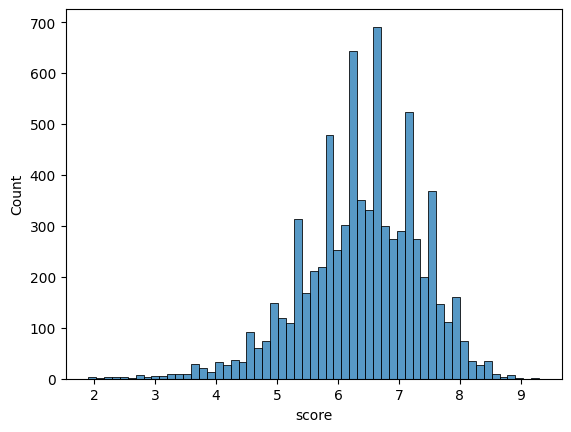

In [ ]:
plot = sns.histplot(data=df, x="score")
plot.set(xlabel='score')
plt.show()

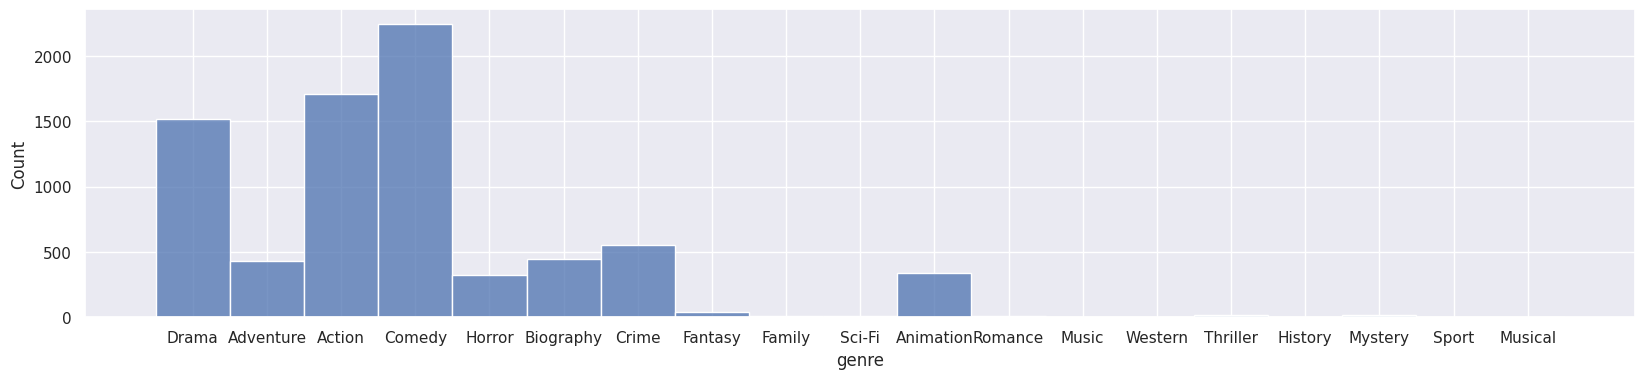

In [ ]:
sns.set(rc={"figure.figsize":(20, 4)})
sns.histplot(data=df, x="genre")
plt.show()

# Data Cleaning


## Binning Numeric Values


In [ ]:
# Seperate score values into bins where each bin has movies with score higher than the 
# values listed in the arrays i.e. bin 1 has scores higher than 0 but lower than 5
bins = np.array([0.0, 5.0, 6.0, 7.0, 8.0, 9.0])
df["new_score_bin"] = np.digitize(df["score"], bins)

In [ ]:
df["new_score_bin"].value_counts()

3    3143
4    1990
2    1692
1     564
5     274
6       5
Name: new_score_bin, dtype: int64

## Removing Unnecessary Columns and Instances

In [ ]:
# Splitting released column into release date and release country
df[['release date', 'release_country']] = df["released"].apply(lambda x: pd.Series(str(x).split("(")))
df["release_country"] = df["release_country"].str[:-1]
df["release_country"].value_counts()

# Keeping only english-speaking countries
df = df.loc[(df["release_country"] == 'United States') | (df["release_country"] == 'United Kingdom') | (df["release_country"] == 'Australia')]
df["release_country"].value_counts()

# Removing unnecessary genres
df = df.loc[(df["genre"] == 'Drama') | (df["genre"] == 'Adventure') | (df["genre"] == 'Action') | (df["genre"] == 'Comedy') | (df["genre"] == 'Horror') | (df["genre"] == 'Biography') | (df["genre"] == 'Crime') | (df["genre"] == 'Fantasy') | (df["genre"] == 'Animation')]
df["genre"].value_counts()

# Removing unnecessary columns
df = df.drop(columns=['rating', 'released','release date','votes', 'country', 'writer', 'gross', 'company', 'budget', 'runtime', 'name', 'director'])
df

,genre,year,score,star,new_score_bin,release_country
0,Drama,1980,8.4,Jack Nicholson,5,United States
1,Adventure,1980,5.8,Brooke Shields,2,United States
2,Action,1980,8.7,Mark Hamill,5,United States
3,Comedy,1980,7.7,Robert Hays,4,United States
4,Comedy,1980,7.3,Chevy Chase,4,United States
...,...,...,...,...,...,...
7662,Action,2020,NaN,Billy Hartmann,6,United States
7663,Drama,2020,3.1,Shannon Bond,1,United States
7664,Comedy,2020,4.7,Michael Saquella,1,United States
7666,Drama,2020,NaN,Christina Roz,6,United States


## Remove Null Rows

In [ ]:
# Remove null genre
df = df.loc[df["genre"].notnull()]

# Remove score
df = df.loc[df["score"].notnull()]

# Genre Cluster Dataset

In [ ]:
one_hot = pd.get_dummies(df['genre'])
# Drop unecessary original columns
genre_df = df.drop(["genre", "year", "score", "new_score_bin","release_country"], axis = 1)
# Join the encoded df
genre_df = genre_df.join(one_hot)
# Group by actor
genre_df = genre_df.groupby(['star'], axis=0, as_index=True).sum()
genre_df

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Fantasy,Horror
star,,,,,,,,,
'Weird Al' Yankovic,0,0,0,0,1,0,0,0,0
50 Cent,0,0,0,1,0,0,0,0,0
A.J. Cook,0,0,0,0,0,0,0,0,1
Aaliyah,0,0,0,0,0,0,1,0,0
Aamir Khan,2,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
Zoe Margaret Colletti,0,1,0,0,0,0,0,0,0
Zoe Saldana,1,0,0,0,0,0,0,0,0
Zoey Deutch,1,0,0,0,2,0,1,0,0


## Find optimal K value for clustering

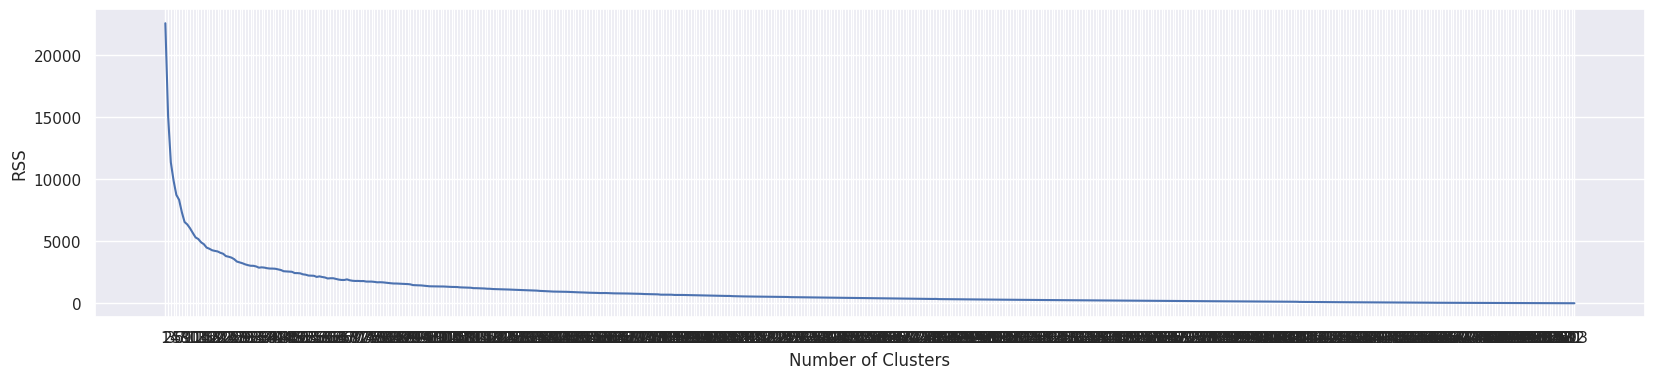

In [ ]:
#create list to hold SSE values for each k
rss = []
for k in range(1, 514):
    kmeans = KMeans(n_clusters=k, init="random", n_init=10, random_state=42)
    kmeans.fit(genre_df)
    rss.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 514), rss)
plt.xticks(range(1, 514))
plt.xlabel("Number of Clusters")
plt.ylabel("RSS")
plt.show()

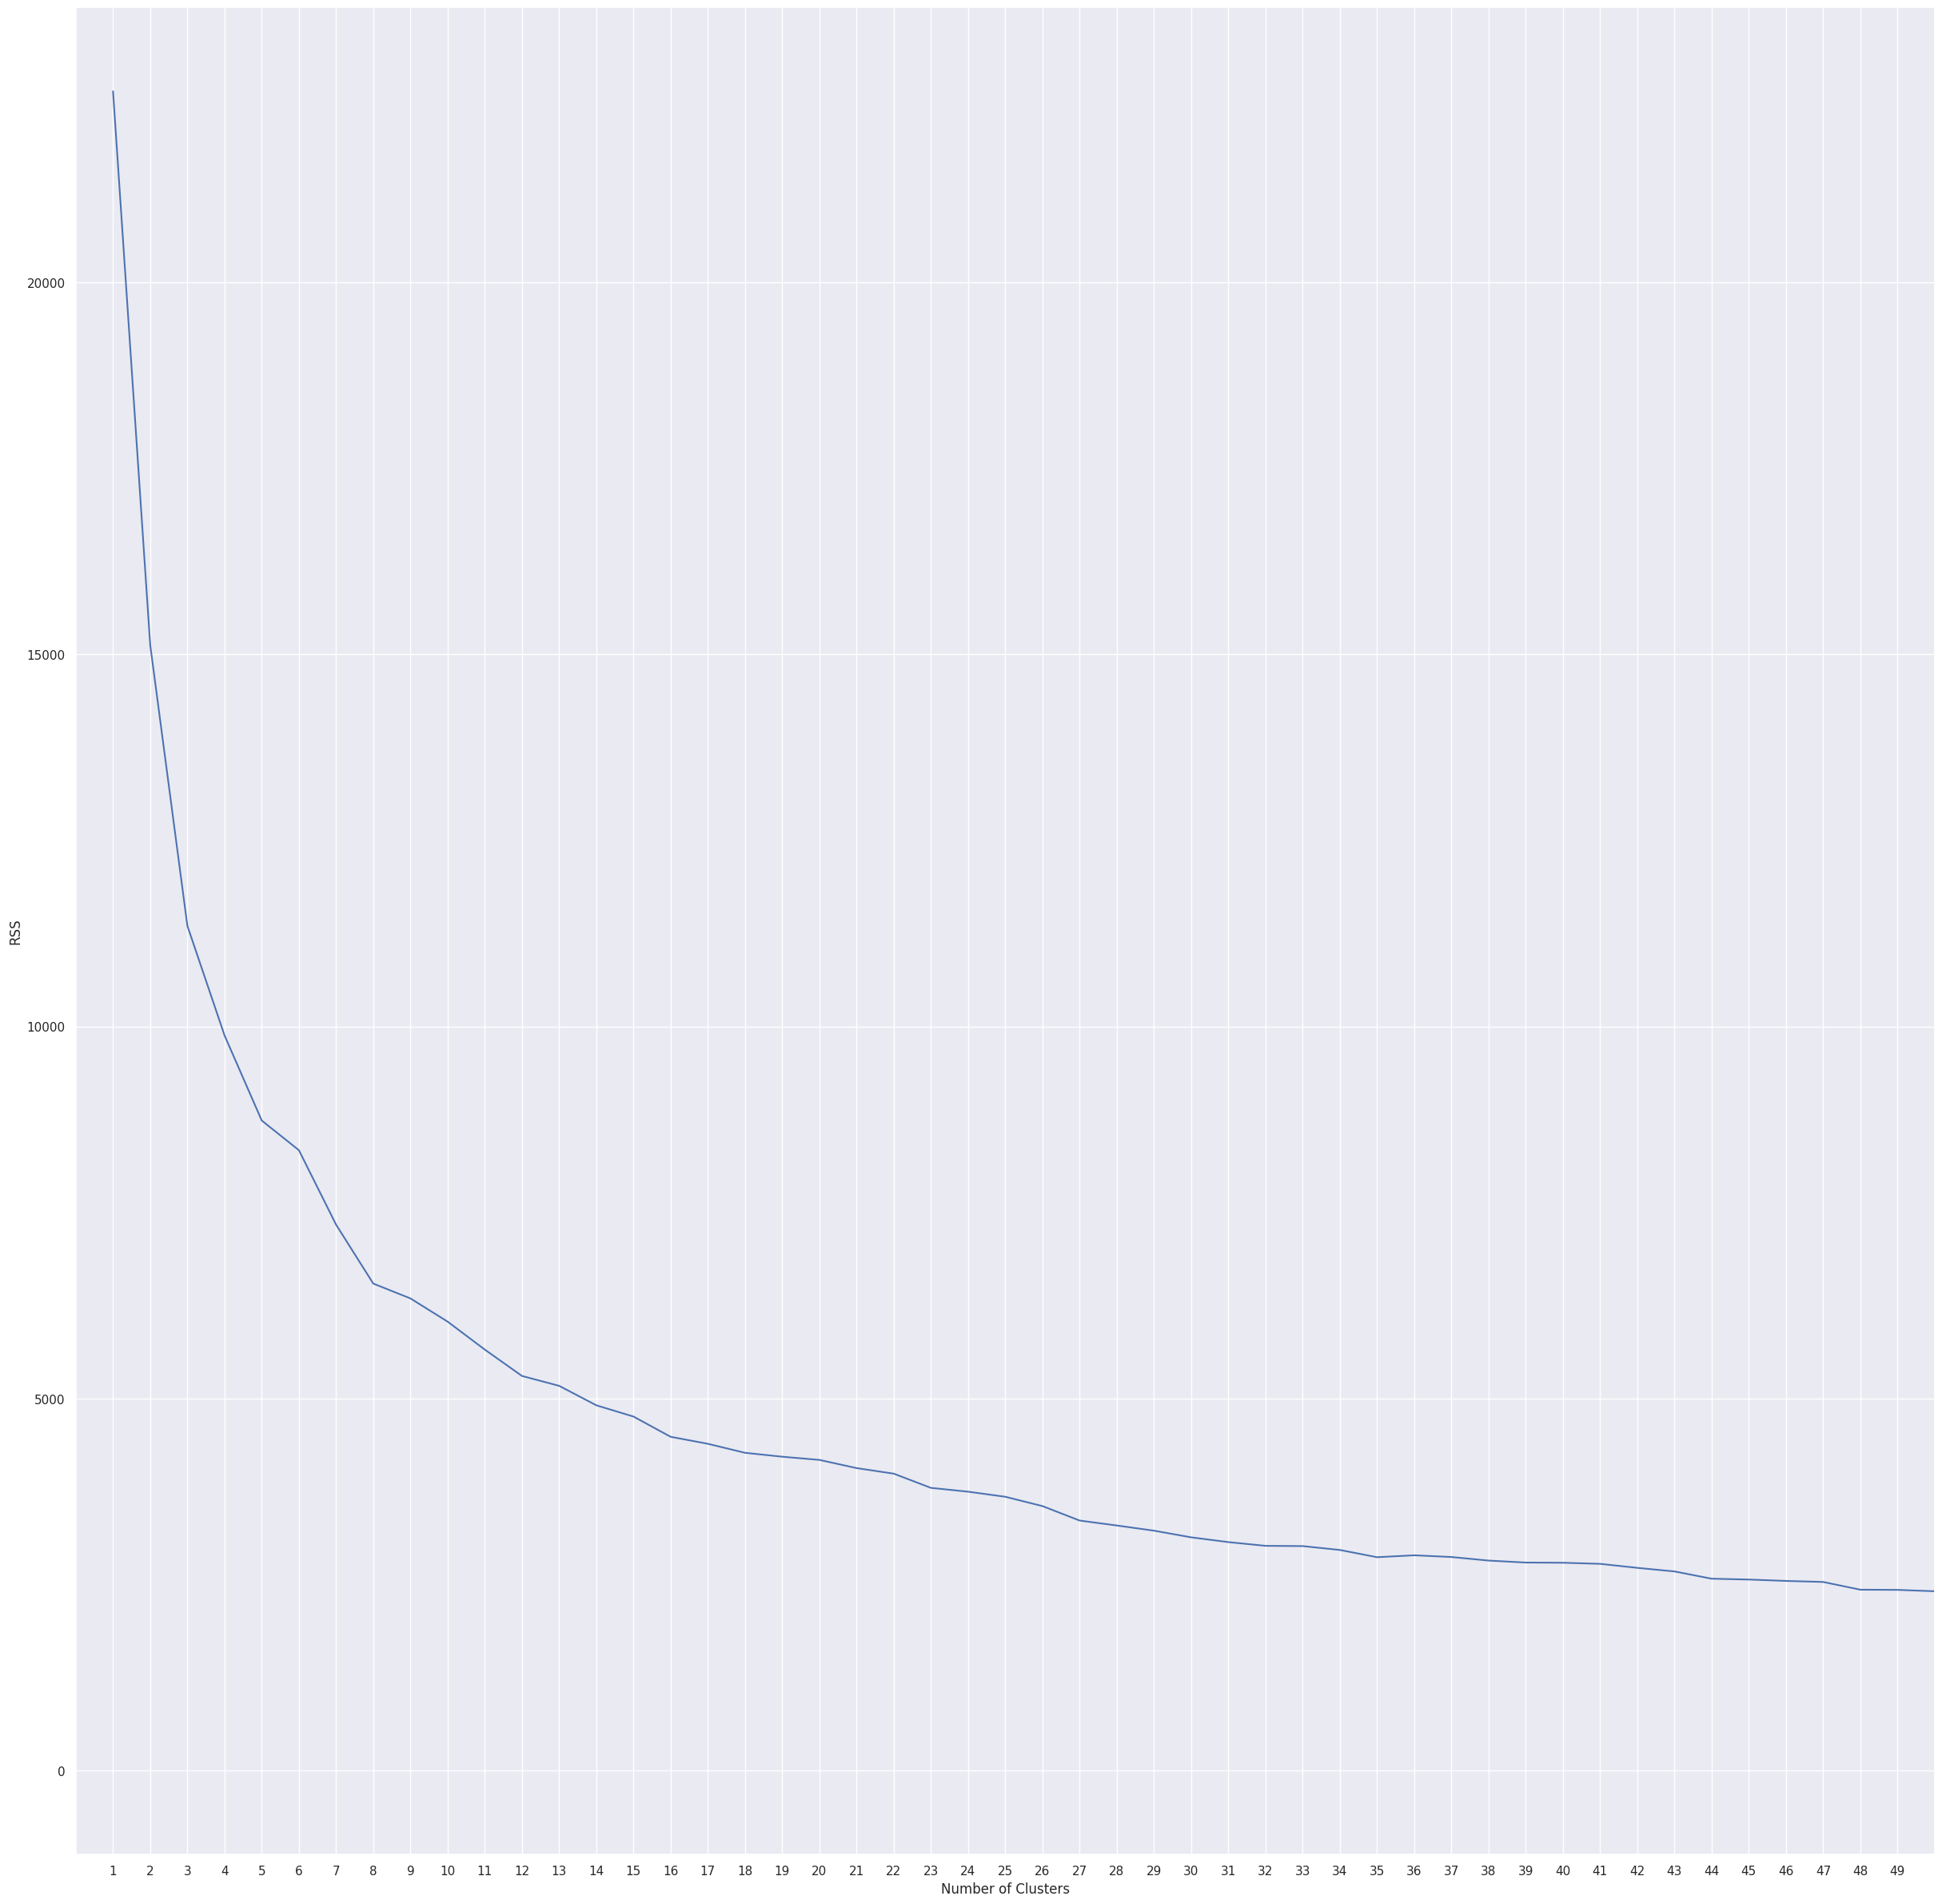

In [ ]:
#visualize results
plt.figure(figsize=(30,30))
plt.xlim(right=50)
plt.plot(range(1, 514), rss)
plt.xticks(range(1, 50))
plt.xlabel("Number of Clusters")
plt.ylabel("RSS")
plt.show()

## Clustering using optimal K value

In [ ]:
# since the elbow on the graph is at K=12 that is the value that will be used for clustering

kmeans = KMeans(init="random", n_clusters=12, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(genre_df)

KMeans(init='random', n_clusters=12, n_init=10, random_state=1)

In [ ]:
# apply cluster labels to the dataset

genre_df['cluster'] = kmeans.labels_

genre_df

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Fantasy,Horror,cluster
star,,,,,,,,,,
'Weird Al' Yankovic,0,0,0,0,1,0,0,0,0,4
50 Cent,0,0,0,1,0,0,0,0,0,3
A.J. Cook,0,0,0,0,0,0,0,0,1,3
Aaliyah,0,0,0,0,0,0,1,0,0,2
Aamir Khan,2,0,0,0,1,0,1,0,0,7
...,...,...,...,...,...,...,...,...,...,...
Zoe Margaret Colletti,0,1,0,0,0,0,0,0,0,3
Zoe Saldana,1,0,0,0,0,0,0,0,0,7
Zoey Deutch,1,0,0,0,2,0,1,0,0,1


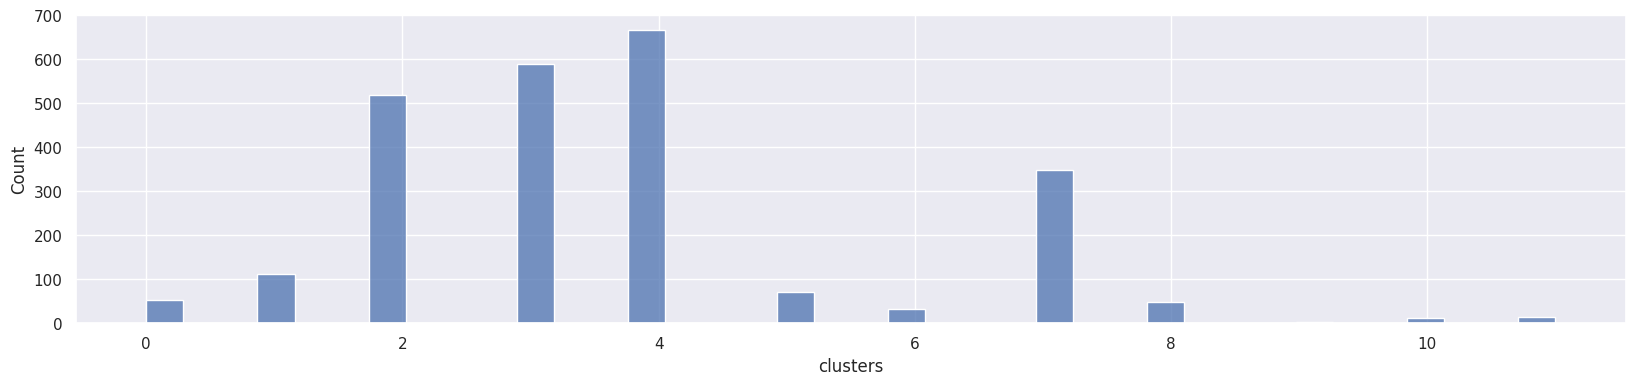

In [ ]:
# histogram of clusters

plot = sns.histplot(data=genre_df, x="cluster")
plot.set(xlabel='clusters')
plt.show()

In [ ]:
# number of occurances in each cluster

genre_df["cluster"].value_counts()

4     667
3     590
2     518
7     348
1     113
5      72
0      52
8      49
6      33
11     15
10     12
9       2
Name: cluster, dtype: int64

In [ ]:
genre_df.loc[genre_df["cluster"] == 8]

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Fantasy,Horror,cluster
star,,,,,,,,,,
Al Pacino,1,1,0,2,4,8,5,0,0,8
Albert Finney,0,0,0,0,0,0,6,0,1,8
Anthony Hopkins,2,0,0,6,3,3,6,0,0,8
Brad Pitt,4,4,1,2,1,2,7,0,0,8
Cate Blanchett,0,0,1,3,2,1,3,0,0,8
Christian Slater,3,0,0,0,2,2,3,0,0,8
Colin Firth,2,0,0,2,2,0,3,0,0,8
Daniel Day-Lewis,1,0,0,3,0,0,7,0,0,8
Diane Lane,0,0,0,1,2,2,3,0,0,8


## Apply clustering to Dataset


In [ ]:
merge_df = genre_df[["cluster"]].copy()
#merge og data with new column for actor clusters
clustered_df = pd.merge(df, merge_df, how ='inner', on ='star')
clustered_df.sort_values(by =['score'])

,genre,year,score,star,new_score_bin,release_country,cluster
5925,Comedy,2008,1.9,Carmen Electra,1,United States,4
1088,Comedy,2004,1.9,Jon Voight,1,United States,5
5367,Action,2003,2.1,Jonathan Cherry,1,United States,7
5412,Comedy,2003,2.1,Kelly Clarkson,1,United States,4
5382,Comedy,2005,2.2,Jamie Kennedy,1,United States,4
...,...,...,...,...,...,...,...
257,Crime,1994,8.9,John Travolta,5,United States,10
3613,Action,2003,8.9,Elijah Wood,5,United States,5
3087,Biography,1993,8.9,Liam Neeson,5,United States,6
2356,Action,2008,9.0,Christian Bale,6,United States,6


# One-Hot Encoding Categorical Features

In [ ]:
#getting count of unique values in each column
for x in clustered_df.columns:
  print(x, ':', len(clustered_df[x].unique()))

genre : 9
year : 41
score : 72
star : 2471
new_score_bin : 6
release_country : 3
cluster : 12


In [ ]:
clustered_df.genre.value_counts().sort_values(ascending=False).head(2)

# change data type to string in order to one hot encode the non-ordinal numeric features
clustered_df['cluster']= clustered_df['cluster'].map(str)
datatypes = clustered_df.dtypes
datatypes

genre               object
year                 int64
score              float64
star                object
new_score_bin        int64
release_country     object
cluster             object
dtype: object

In [ ]:
#lists created for one-hot encoding
genres = [x for x in clustered_df.genre.value_counts().sort_values(ascending=False).head(9).index]
countries = [x for x in clustered_df.release_country.value_counts().sort_values(ascending=False).head(3).index]
clusters = [x for x in clustered_df.cluster.value_counts().sort_values(ascending=False).head(12).index]

clusters

['4', '2', '3', '1', '0', '8', '6', '5', '7', '11', '10', '9']

In [ ]:
#saving a copy of dataframe
df = clustered_df 

# make binary of labels for genre, release country, cluster, new score bin
for label in genres:
  clustered_df["genre: "+label] = np.where(clustered_df['genre']==label,1,0)

for label in countries:
  clustered_df["country: "+label] = np.where(clustered_df['release_country']==label,1,0)

for label in clusters:
 clustered_df["cluster: "+label] = np.where(clustered_df['cluster']==label,1,0)

clustered_df = df.drop(['genre', 'score', 'star', 'release_country', 'cluster'], axis =1)
clustered_df

,year,new_score_bin,genre: Comedy,genre: Action,genre: Drama,genre: Crime,genre: Adventure,genre: Biography,genre: Animation,genre: Horror,...,cluster: 3,cluster: 1,cluster: 0,cluster: 8,cluster: 6,cluster: 5,cluster: 7,cluster: 11,cluster: 10,cluster: 9
0,1980,5,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1981,3,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1982,3,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1985,3,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1987,3,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6907,2020,3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6908,2020,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
6909,2020,4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6910,2020,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Decision Tree

In [ ]:
tree.d = DecisionTreeClassifier(min_samples_split=100, criterion='entropy', 
                             max_depth=7)

# Naive Bayes

In [ ]:
clf = MultinomialNB(force_alpha=True)

# Visualization of Results and Accuracy Evaluation

## Decision Tree Evaluation

K Fold Cross Validation

In [ ]:
feature_names=['year', 'genre: Comedy', 'genre: Action', 'genre: Drama', 'genre: Crime', 'genre: Adventure', 'genre: Biography', 'genre: Animation',
               'genre: Horror', 'genre: Fantasy', 'country: United States', 'country: United Kingdom', 'country: Australia', 
               'cluster: 0', 'cluster: 1', 'cluster: 2', 'cluster: 3', 'cluster: 4', 'cluster: 5', 'cluster: 6', 'cluster: 7', 'cluster: 8',
               'cluster: 9', 'cluster: 10', 'cluster: 11']

In [ ]:
y = clustered_df["new_score_bin"]

X = clustered_df.filter(regex='^((?!new_score_bin).)*$', axis=1)

kf =KFold(n_splits=10, shuffle=True, random_state=42)

cnt = 1
for train_index, test_index in kf.split(X, y):
   print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
   cnt += 1

Fold:1, Train set: 6220, Test set:692
Fold:2, Train set: 6220, Test set:692
Fold:3, Train set: 6221, Test set:691
Fold:4, Train set: 6221, Test set:691
Fold:5, Train set: 6221, Test set:691
Fold:6, Train set: 6221, Test set:691
Fold:7, Train set: 6221, Test set:691
Fold:8, Train set: 6221, Test set:691
Fold:9, Train set: 6221, Test set:691
Fold:10, Train set: 6221, Test set:691


In [ ]:
def rmse_tree(score):
    rmse_tree = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse_tree)}')

In [ ]:
#GETTING RMSE FROM K FOLD VALIDATION
#code adapted from:
#K Fold Cross Validation
#Author: Satish Gunjal
#https://satishgunjal.com/kfold/
score_tree = cross_val_score(tree.d, X, y, cv=kf, scoring="neg_mean_squared_error")

print(f'Scores for each fold: {score_tree}')
rmse_tree(score_tree.mean())

Scores for each fold: [-0.93930636 -1.01156069 -0.91316932 -0.88422576 -0.93487699 -0.91027496
 -0.88856729 -0.89435601 -0.8683068  -0.91751085]
rmse= 0.96


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, # X 
                                                    y,         # y
                                                    test_size=0.10,      
                                                    random_state = 42)    # consistent split

In [ ]:
#Running tree for visualization
tree.d.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=100)

In [ ]:
import imageio,io
import pydotplus

In [ ]:
# write function to plot the decision tree
def show_tree(tree, features, path):
  # make file stream to read/write
  f = io.StringIO()
  # export the graph into dot format and save it to the io stream
  export_graphviz(tree, out_file=f, feature_names=feature_names, class_names=['1', '2', '3', '4', '5', '6'],
                  filled=True, rounded=True) # for nicer visualization
  # read the dot data and trnasform it into a png, then save it to path
  pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
  # read the png image saved at path
  img = imageio.imread(path)
  # plot the png image in the notebook
  plt.rcParams['figure.figsize'] = (20,20)
  plt.imshow(img)

<ipython-input-36-d9994ab0b135>:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(path)


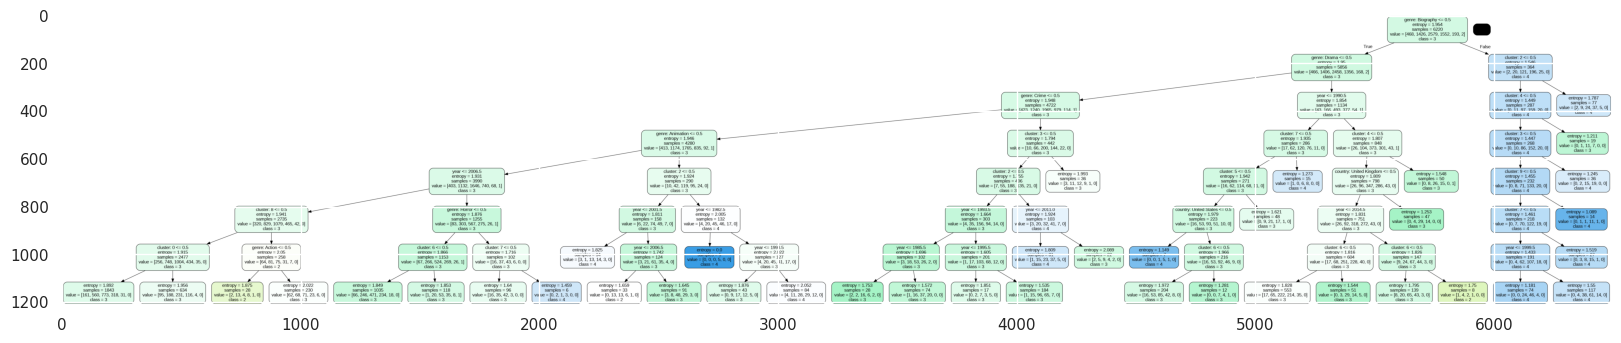

In [ ]:
# plot the decision tree
show_tree(tree.d, feature_names,'decision_tree')

In [ ]:
y_pred = tree.d.predict(X_test)
from sklearn.metrics import accuracy_score

# get the accurancy
accuracy  = accuracy_score(y_test,y_pred)
print("Accuracy using Decision Tree: ", accuracy*100)

print("\nPredicted values:")
print(y_pred)

Accuracy using Decision Tree:  43.20809248554913

Predicted values:
[3 3 4 3 3 3 3 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3
 3 3 3 3 3 3 4 3 3 3 4 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 2 4 3 3 3 3 3 4 3 3 2 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 4 3 3 3 3 3 3 3 3 3 3 3 4 3 4 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 4
 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 3 3 3 4
 3 4 3 4 3 3 3 3 3 3 3 3 3 4 3 3 3 4 4 3 3 2 3 3 3 4 3 3 3 3 3 3 3 3 3 3 4
 3 4 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 4 2 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3
 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3

Confusion Matrix

In [ ]:
## import 
from sklearn.metrics import confusion_matrix
## create matrix
confusion_matrix(y_test, y_pred, labels=[1, 2, 3, 4, 5, 6])

array([[  0,   0,  56,   1,   0,   0],
       [  0,   3, 140,   6,   0,   0],
       [  0,   3, 265,  23,   0,   0],
       [  0,   1, 139,  31,   0,   0],
       [  0,   0,  20,   4,   0,   0],
       [  0,   0,   0,   0,   0,   0]])

## Naive Bayes Evaluation

In [ ]:
# Accuracy of a Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
algorithm = GaussianNB(priors=None, var_smoothing=1e-9)

algorithm.fit(X, y)

print('The Gaussian Model Has Achieved %.2f Percent Accuracy'%(algorithm.score(X, y)*100))

# Gaussian Naive Bayes has very low accuracy, in order to improve this we will try Multinomial Naive Bayes

The Gaussian Model Has Achieved 10.29 Percent Accuracy


In [ ]:
# Accuracy of a Multionomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(force_alpha=True)

clf.fit(X, y)
print('The Multinomial Model Has Achieved %.2f Percent Accuracy'%(clf.score(X, y)*100))

# testing if model outputs value
print("\nPredicted Value:")
print(clf.predict(X[2:3])[0])

The Multinomial Model Has Achieved 43.19 Percent Accuracy

Predicted Value:
3


In [ ]:
# K-Folds Cross Validation
kf_bayes = KFold(n_splits=10, shuffle = True, random_state =42)

cnt = 1
for train_index, test_index in kf_bayes.split(X,y):
   print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
   cnt += 1

Fold:1, Train set: 6220, Test set:692
Fold:2, Train set: 6220, Test set:692
Fold:3, Train set: 6221, Test set:691
Fold:4, Train set: 6221, Test set:691
Fold:5, Train set: 6221, Test set:691
Fold:6, Train set: 6221, Test set:691
Fold:7, Train set: 6221, Test set:691
Fold:8, Train set: 6221, Test set:691
Fold:9, Train set: 6221, Test set:691
Fold:10, Train set: 6221, Test set:691


In [ ]:
def rmse_bayes(score_bayes):
  rmse_bayes = np.sqrt(-score_bayes)
  print(f'rmse= {"{:.2f}".format(rmse_bayes)}')

In [ ]:
score_bayes = cross_val_score(clf, X, y, cv=kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score_bayes}')
rmse_bayes(score_bayes.mean())

Scores for each fold: [-0.90317919 -0.9132948  -0.95803184 -0.89435601 -0.99131693 -0.9536903
 -0.91751085 -0.9015919  -0.94211288 -0.90303907]
rmse= 0.96


In [ ]:
X_train_bayes, X_test_bayes, y_train_bayes, y_test_bayes = train_test_split(X, # X 
                                                    y,         # y
                                                    test_size=0.10,      
                                                    random_state = 42)    # consistent split

y_pred_bayes = clf.predict(X_test_bayes)

Confusion Matrix

In [ ]:
# create matrix
confusion_matrix(y_test_bayes, y_pred_bayes, labels=[1, 2, 3, 4, 5, 6])

array([[  0,  10,  46,   1,   0,   0],
       [  0,  11, 132,   6,   0,   0],
       [  0,   7, 255,  29,   0,   0],
       [  0,   4, 135,  32,   0,   0],
       [  0,   0,  18,   6,   0,   0],
       [  0,   0,   0,   0,   0,   0]])

#User Input

## Getting user input

In [ ]:
# Accepts user input and assigns it to variables
print("Movie Information:\n")
print("What year was the movie released?")
user_movie_year = int(input())
print("What genre is the movie? (Action/Adventure/Animation/Biography/Comedy/Crime/Drama/Fantasy/Horror)")
user_movie_genre = input()
print("What country has the movie been released in? (Australia/United Kingdom/United States)")
user_movie_country = input()

print("\nLead Actor Information:\n")
print("How many Action movies has the actor been in?")
user_actor_action = input()
print("How many Adventure movies has the actor been in?")
user_actor_adventure = input()
print("How many Animation movies has the actor been in?")
user_actor_animation = input()
print("How many Biography movies has the actor been in?")
user_actor_biography = input()
print("How many Comedy movies has the actor been in?")
user_actor_comedy = input()
print("How many Crime movies has the actor been in?")
user_actor_crime = input()
print("How many Drama movies has the actor been in?")
user_actor_drama = input()
print("How many Fantasy movies has the actor been in?")
user_actor_fantasy = input()
print("How many Horror movies has the actor been in?")
user_actor_horror = input()

Movie Information:

What year was the movie released?
2009
What genre is the movie? (Action/Adventure/Animation/Biography/Comedy/Crime/Drama/Fantasy/Horror)
Drama
What country has the movie been released in? (Australia/United Kingdom/United States)
Australia

Lead Actor Information:

How many Action movies has the actor been in?
0
How many Adventure movies has the actor been in?
0
How many Animation movies has the actor been in?
0
How many Biography movies has the actor been in?
0
How many Comedy movies has the actor been in?
1
How many Crime movies has the actor been in?
1
How many Drama movies has the actor been in?
3
How many Fantasy movies has the actor been in?
0
How many Horror movies has the actor been in?
0


## Clustering user input

In [ ]:
# Drop "cluster" column
genre_df = genre_df.drop("cluster", axis=1, errors='ignore')

# Append input information to dataframe
temp_df = pd.DataFrame([[user_actor_action, user_actor_adventure, user_actor_animation, user_actor_biography, user_actor_comedy, user_actor_crime, user_actor_drama, user_actor_fantasy, user_actor_horror]], 
                       columns=["Action", "Adventure", "Animation", "Biography", "Comedy", "Crime", "Drama", "Fantasy", "Horror"], index=["user_input"])

# Added the user values to the genre dataframe
if ("user_input" not in genre_df.index):
    genre_df = pd.concat([genre_df, temp_df])
else:
  genre_df = genre_df.drop(index = "user_input")
  genre_df = pd.concat([genre_df, temp_df])

# Apply clustering
kmeans = KMeans(init="random", n_clusters=12, n_init=10, random_state=1)

kmeans.fit(genre_df)

genre_df['cluster'] = kmeans.labels_

# Get information about user cluster
clustered_actor_df = genre_df.loc["user_input"]

## Prepare user input data

In [ ]:
# Create of copy of the inputed actor information
user_df = clustered_actor_df.copy()

# Add columns for movie data
user_df["year"] = user_movie_year
user_df["genre"] = user_movie_genre
user_df["release_country"] = user_movie_country

# Convert "cluster" to a string type
user_df["cluster"] = user_df["cluster"].astype(str) 

# Create lists for one-hot encoding loops
genresList = ['Comedy', 'Action', 'Drama', 'Crime', 'Adventure', 'Biography', 'Animation', 'Horror', 'Fantasy']
countriesList = ['United States', 'United Kingdom', 'Australia']
clustersList = ["4", "2", "3", "1", "0", "8", "6", "5", "7", "11", "10", "9"]

# One-Hot Encode the categories
for label in genres:
  user_df["genre: "+label] = np.where(user_df['genre']==label,1,0).sum()

for label in countries:
  user_df["country: "+label] = np.where(user_df['release_country']==label,1,0).sum()

for label in clusters:
 user_df["cluster: "+label] = np.where(user_df['cluster'].astype(str)==label,1,0).sum()

# Drop number of movies in each genre
user_df = user_df.drop(['Comedy', 'Action', 'Drama', 'Crime', 'Adventure', 'Biography', 'Animation', 'Horror', 'Fantasy'])
# Drop unused values from the array
user_df = user_df.drop(['genre', 'release_country', 'cluster'])

user_df

year                       2009
genre: Comedy                 0
genre: Action                 0
genre: Drama                  1
genre: Crime                  0
genre: Adventure              0
genre: Biography              0
genre: Animation              0
genre: Horror                 0
genre: Fantasy                0
country: United States        0
country: United Kingdom       0
country: Australia            1
cluster: 4                    0
cluster: 2                    0
cluster: 3                    0
cluster: 1                    0
cluster: 0                    0
cluster: 8                    0
cluster: 6                    0
cluster: 5                    0
cluster: 7                    0
cluster: 11                   0
cluster: 10                   1
cluster: 9                    0
Name: user_input, dtype: object

In [ ]:
# Convert to dataframe
user_df = user_df.to_frame()

In [ ]:
# Transpose rows to columns
user_df = user_df.transpose()
user_df

,year,genre: Comedy,genre: Action,genre: Drama,genre: Crime,genre: Adventure,genre: Biography,genre: Animation,genre: Horror,genre: Fantasy,...,cluster: 3,cluster: 1,cluster: 0,cluster: 8,cluster: 6,cluster: 5,cluster: 7,cluster: 11,cluster: 10,cluster: 9
user_input,2009,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# User Input Prediction

## Predict result using Decision Tree

In [ ]:
# Using decision tree and the user input predict the expected audience score 
result_pred = tree.d.predict(user_df)

ratingRanges = ["0%-49%", "50%-59%", "60%-69%", "70%-79%", "80%-89%", "90%-100%"]

print("Predicted Rating Range: " + ratingRanges[result_pred[0]-1])

Predicted Rating Range: 60%-69%


## Predict Result Using Naive Bayes

In [ ]:
#clf = MultinomialNB(force_alpha=True)
y = clustered_df["new_score_bin"]
X = clustered_df.filter(regex='^((?!new_score_bin).)*$', axis=1)
clf.fit(X, y)
user_df
# print(clf.predict(user_df.filter(regex='^((?!new_score_bin).)*$', axis=1)))
result_predNB = clf.predict(user_df)
print ("Predicted Rating Range: " + ratingRanges[result_predNB[0]-1])

Predicted Rating Range: 60%-69%
